<a href="https://colab.research.google.com/github/BagusAth/Challange_SIC6/blob/main/Image_Processing_with_Python_SIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing dengan Pillow & NumPy

Dalam tutorial ini, kita akan menggunakan dua pustaka Python penting untuk pemrosesan gambar:
- Numpy: Pustaka untuk komputasi numerik yang sangat efektif untuk menangani array multidimensi, yang merupakan fondasi gambar digital.
- PIL (Pillow): Pustaka untuk membuka, memanipulasi, dan menyimpan berbagai format berkas gambar.

In [1]:
# instalasi
!pip install numpy pillow

In [2]:
from PIL import Image
import numpy as np

Gambar RGB biasanya disimpan sebagai array 3 dimensi dari bilangan bulat 8-bit yang tidak bertanda. Bentuk arraynya adalah:
```txt
height x width x 3.
```
Berikut ini cara kita membuat array untuk mewakili gambar berukuran lebar 5 piksel dan tinggi 4 piksel:

In [5]:
import numpy as np

width = 5
height = 4

array = np.zeros([height, width, 3], dtype=np.uint8)
array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

Perhatikan bahwa dimensi pertama adalah tinggi, dan dimensi kedua adalah lebar. Hal ini dikarenakan data diurutkan berdasarkan baris, kemudian setiap baris diurutkan berdasarkan piksel, dan terakhir, setiap piksel berisi nilai 3-byte untuk RGB. Setiap warna direpresentasikan oleh unsigned byte (tipe numpy uint8).

sekarang kita dapat menggunakan fromarray untuk membuat gambar PIL dari array NumPy, dan menyimpannya sebagai file PNG:

In [6]:
from PIL import Image

img = Image.fromarray(array)
img.save('testrgb.png')

Fungsi PIL `Image.fromarray` membuat gambar PIL dari array NumPy. Jika array NumPy memiliki bentuk (tinggi, lebar, 3) maka secara otomatis akan membuat gambar RGB. Kita kemudian dapat menggunakan fungsi PIL save untuk menyimpan gambar. Secara default, jenis gambar akan didasarkan pada ekstensi file, jadi dalam kasus ini, gambar akan berformat PNG.

In [7]:
import numpy as np
from PIL import Image

array = np.zeros([100, 200, 3], dtype=np.uint8)
array[:,:100] = [255, 128, 0] #Orange left side
array[:,100:] = [0, 0, 255]   #Blue right side

img = Image.fromarray(array)
img.save('testrgb.png')

Sekarang mari tambahkan beberapa kode untuk membuat gambar NumPy dan kemudian menyimpannya:

In [ ]:
import numpy as np
from PIL import Image

array = np.zeros([100, 200, 3], dtype=np.uint8)
array[:,:100] = [255, 128, 0] #Orange left side
array[:,100:] = [0, 0, 255]   #Blue right side

img = Image.fromarray(array)
img.save('testrgb.png')

Apa fungsi kode ini?

- Membuat susunan piksel berukuran 100 (tinggi) x 200 (lebar) x 3 (warna).
- Gunakan notasi irisan untuk mengisi bagian kiri array dengan warna oranye.
- Gunakan notasi irisan untuk mengisi bagian kanan array dengan warna biru.

Gambar skala abu-abu (grayscale) ditangani sedikit berbeda. Karena hanya ada satu saluran, tidak perlu membuat array 3 dimensi, Anda harus menggunakan array 2 dimensi sebagai gantinya:

In [ ]:
import numpy as np
from PIL import Image

array = np.zeros([100, 200], dtype=np.uint8)

# Set grey value to black or white depending on x position
for x in range(200):
    for y in range(100):
        if (x % 16) // 8 == (y % 16) // 8:
            array[y, x] = 0
        else:
            array[y, x] = 255

img = Image.fromarray(array)
img.save('testgrey.png')

Anda dapat membaca gambar menggunakan fungsi PIL open, dan mengonversinya menjadi array menggunakan fungsi numpy array. Di sini, kita membaca gambar yang dibuat sebelumnya, dan mencetak bentuk NumPy-nya:

In [ ]:
!curl -o rgb_image.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ1rSXxAC4gUqT6gG9U4X61R4Ajd-gojad8dw&s

/bin/bash: line 1: s: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14233  100 14233    0     0  93113      0 --:--:-- --:--:-- --:--:-- 93026


In [ ]:
import numpy as np
from PIL import Image

img = Image.open('rgb_image.jpg')
array = np.array(img)
print(array.shape)

(195, 259, 3)


Anda dapat menampilkan gambar menggunakan matplotlib.

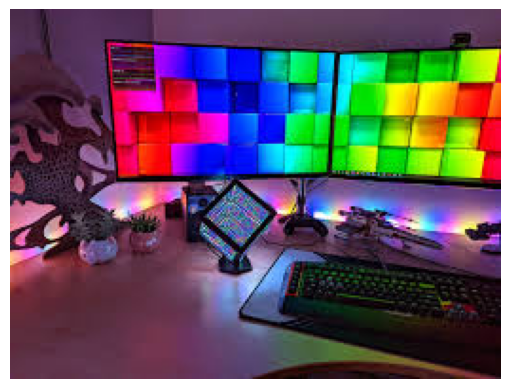

In [ ]:
import matplotlib.pyplot as plt

try:
  img = Image.open('rgb_image.jpg')
  plt.imshow(img)
  plt.axis('off') # Hide axes
  plt.show()
except FileNotFoundError:
  print("Error: 'rgb_image.jpg' not found. Please make sure the file exists.")
except Exception as e:
  print(f"An error occurred: {e}")

# Manipulasi Gambar

## **1. Image Resizing**

Untuk mengubah ukuran gambar, kami menggunakan fungsi `resize()` dari PIL dan kemudian mengubahnya menjadi array Numpy.

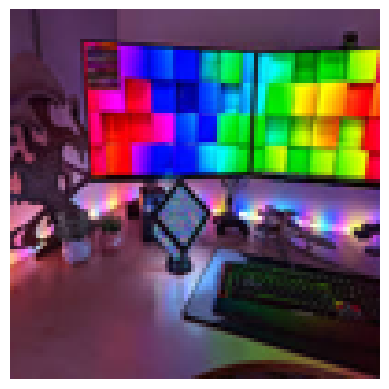

In [ ]:
# Resize the image to 100x100 pixels
resized_image = img.resize((100, 100))

# Convert the resized image to a numpy array
resized_image_array = np.array(resized_image)

# Display the resized image
plt.imshow(resized_image_array)
plt.axis('off')
plt.show()


## **2. Cropping**

Untuk memotong gambar, kita cukup mengiris array Numpy untuk memilih wilayah tertentu.

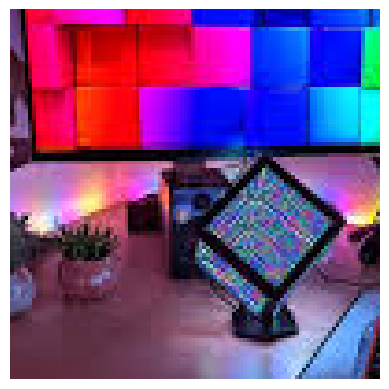

In [ ]:
# Open an image file
img = Image.open('rgb_image.jpg')

# Convert the image to a numpy array
image_array = np.array(img)


# Crop the image (for example, take the region from pixel (50,50) to (150,150))
cropped_image_array = image_array[50:150, 50:150]

# Display the cropped image
plt.imshow(cropped_image_array)
plt.axis('off')
plt.show()


## **3.  Converting the Image to Grayscale**

Untuk mengubah gambar menjadi skala abu-abu, kita dapat menggunakan metode bawaan PIL, atau secara manual menghitung rata-rata saluran RGB:

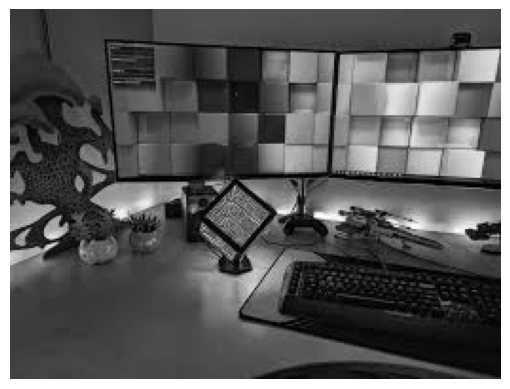

In [ ]:
# Convert the image to grayscale using PIL
grayscale_image = img.convert('L')

# Convert the grayscale image to a numpy array
grayscale_image_array = np.array(grayscale_image)

# Display the grayscale image
plt.imshow(grayscale_image_array, cmap='gray')
plt.axis('off')
plt.show()

## **4. Image Rotation**

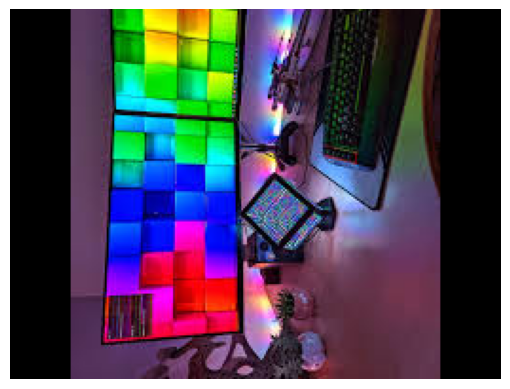

In [ ]:
# Rotate the image 90 degrees
rotated_image = img.rotate(90)

# Display the rotated image
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

## **5. Applying a Color Filter**

Anda dapat memanipulasi nilai piksel untuk mengubah warna gambar. Misalnya, untuk membuat filter merah, Anda dapat menghapus saluran hijau dan biru:

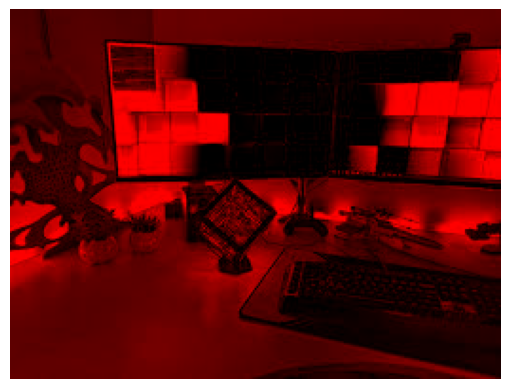

In [ ]:
# Set the green and blue channels to 0 to create a red-only image
image_array_red = image_array.copy()
image_array_red[:, :, 1] = 0  # Remove the green channel
image_array_red[:, :, 2] = 0  # Remove the blue channel

# Display the red-only image
plt.imshow(image_array_red)
plt.axis('off')
plt.show()


In [ ]:
# Save the manipulated image
result_image = Image.fromarray(image_array_red)  # Convert the array back to an image
result_image.save('image_with_red_channel.jpg')

# Image Processing dengan OpenCV

**OpenCV** (Open Source Computer Vision Library) adalah **perpustakaan perangkat lunak (library)** yang dirancang untuk aplikasi pengolahan gambar dan visi komputer (computer vision). OpenCV adalah pustaka **open-source** yang memungkinkan pengembang untuk bekerja dengan gambar dan video dalam berbagai cara, seperti mendeteksi objek, mengenali wajah, pelacakan gerakan, dan banyak aplikasi lainnya yang berkaitan dengan pengolahan citra.

**Fitur Utama OpenCV:**

1. **Pengolahan Gambar**:
   - Mengubah ukuran gambar, memutar gambar, memotong bagian gambar.
   - Menerapkan berbagai jenis filter, misalnya filter blur, edge detection, dan filter lainnya.
   
2. **Deteksi dan Pengenalan Objek**:
   - Menggunakan algoritma machine learning dan deep learning untuk mendeteksi objek dalam gambar atau video.
   - Deteksi wajah, barcode, atau QR code.
   
3. **Pengenalan Wajah dan Gestur**:
   - OpenCV sering digunakan untuk membangun aplikasi yang mampu mendeteksi wajah dan mengenali individu dalam gambar atau video secara real-time.
   - Termasuk juga pengenalan ekspresi wajah atau gerakan tangan.
   
4. **Analisis Video**:
   - Menganalisis video dalam real-time, misalnya dengan memproses aliran video atau mendeteksi gerakan.
   - Mendeteksi objek yang bergerak dalam frame video.
   
5. **Kalibrasi Kamera**:
   - Menggunakan teknik pengolahan gambar untuk memperbaiki distorsi gambar yang disebabkan oleh lensa kamera.
   - Pengolahan gambar 3D, pengolahan stereo vision, dan rekonstruksi 3D.

6. **Pengolahan Citra Warna dan Teks**:
   - OpenCV dapat mengonversi gambar dari satu ruang warna ke ruang warna lain, seperti dari RGB ke Grayscale atau HSV.
   - Menambahkan teks pada gambar atau video untuk keperluan anotasi.

7. **Fitur Pencocokan Gambar**:
   - Mencocokkan gambar berdasarkan fitur yang ditemukan dalam gambar yang berbeda, seperti fitur SIFT, SURF, dan ORB.
   
**Kelebihan OpenCV:**
- **Open-source**: OpenCV dapat digunakan secara gratis dan dapat dimodifikasi sesuai kebutuhan.
- **Multiplatform**: OpenCV dapat dijalankan di berbagai sistem operasi seperti Windows, macOS, dan Linux.
- **Dukungan Bahasa Pemrograman**: OpenCV mendukung beberapa bahasa pemrograman seperti **C++, Python, Java, dan lainnya**, yang membuatnya fleksibel untuk digunakan dalam berbagai jenis proyek.
- **Komunitas Besar**: Karena bersifat open-source, OpenCV memiliki komunitas yang besar dan aktif, sehingga banyak tutorial, dokumentasi, dan contoh kode yang dapat membantu dalam pengembangan aplikasi.

**Contoh Penggunaan OpenCV:**
- **Pengenalan Wajah**: Deteksi dan pengenalan wajah menggunakan kamera untuk aplikasi keamanan atau pengenalan identitas.
- **Pelacakan Objek**: Mengetahui posisi objek tertentu dalam video atau gambar.
- **Augmented Reality (AR)**: Menggabungkan objek virtual dengan dunia nyata menggunakan video.



## Image Resizing & Cropping

Kita akan coba lakukan image resizing dengan OpenCV

In [ ]:
!curl -o rgb_cat.jpg https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  723k  100  723k    0     0  2126k      0 --:--:-- --:--:-- --:--:-- 2127k


In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('rgb_cat.jpg')

# Mengecek ukuran gambar
height, width, channels = img.shape  # height = tinggi, width = lebar, channels = saluran warna

# Menampilkan ukuran gambar
print(f"Ukuran Gambar: {width} x {height}")
print(f"Jumlah Saluran Warna: {channels}")

Ukuran Gambar: 1862 x 2804
Jumlah Saluran Warna: 3


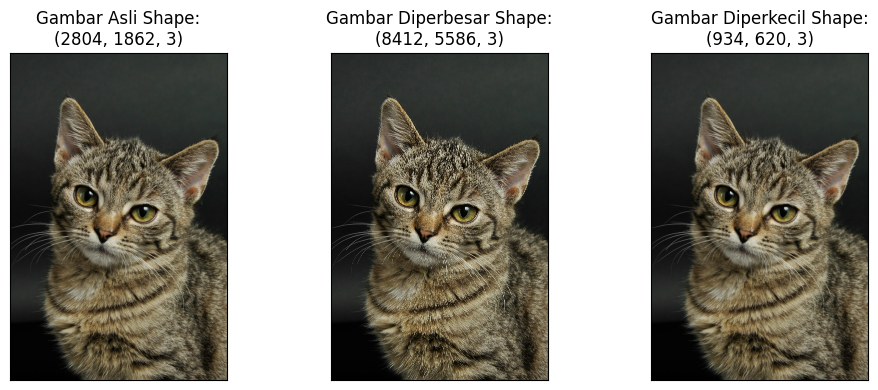

In [ ]:
# Mengubah gambar dari format BGR (OpenCV default) ke RGB agar bisa ditampilkan dengan benar
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mendefinisikan faktor skala
# Memperbesar ukuran gambar 3 kali
scale_factor_1 = 3.0
# Memperkecil ukuran gambar 3 kali
scale_factor_2 = 1/3.0

# Mendapatkan dimensi gambar asli
height, width = image_rgb.shape[:2]

# Menghitung dimensi gambar yang baru (dengan faktor skala 3 kali lebih besar)
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

# Mengubah ukuran gambar (memperbesar gambar)
zoomed_image = cv2.resize(src=image_rgb,
                          dsize=(new_width, new_height),
                          interpolation=cv2.INTER_CUBIC)

# Menghitung dimensi gambar yang baru (dengan faktor skala 1/3 lebih kecil)
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)

# Mengubah ukuran gambar (memperkecil gambar)
scaled_image = cv2.resize(src=image_rgb,
                          dsize=(new_width1, new_height1),
                          interpolation=cv2.INTER_AREA)

# Membuat subplot untuk menampilkan gambar-gambar
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Menampilkan gambar asli
axs[0].imshow(image_rgb)
axs[0].set_title('Gambar Asli Shape:\n' + str(image_rgb.shape))

# Menampilkan gambar yang diperbesar (zoomed image)
axs[1].imshow(zoomed_image)
axs[1].set_title('Gambar Diperbesar Shape:\n' + str(zoomed_image.shape))

# Menampilkan gambar yang diperkecil (scaled image)
axs[2].imshow(scaled_image)
axs[2].set_title('Gambar Diperkecil Shape:\n' + str(scaled_image.shape))

# Menghilangkan ticks pada subplot
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Menampilkan subplot
plt.tight_layout()
plt.show()

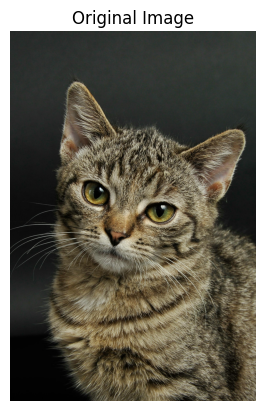

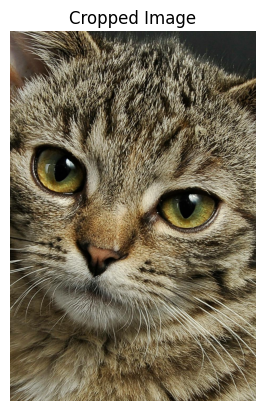

Gambar berhasil disimpan di Cropped_Image.jpg


In [ ]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memuat dan menampilkan gambar
def load_and_show_image(image_path):
    """
    Memuat gambar dari path yang diberikan dan menampilkan gambar tersebut.
    :param image_path: Lokasi file gambar yang akan dimuat
    :return: Gambar yang dimuat
    """
    # Memuat gambar dari file
    img = cv2.imread(image_path)

    # Mengubah gambar dari format BGR (default OpenCV) ke RGB agar bisa ditampilkan dengan benar
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar menggunakan matplotlib
    plt.imshow(img_rgb)
    plt.title("Original Image")
    plt.axis('off')  # Menghilangkan sumbu
    plt.show()

    return img  # Mengembalikan gambar yang dimuat

# Fungsi untuk memotong (crop) gambar
def crop_image(image, start_x, start_y, end_x, end_y):
    """
    Memotong gambar sesuai dengan koordinat yang diberikan.
    :param image: Gambar yang akan dipotong
    :param start_x: Koordinat x untuk titik awal (kiri atas)
    :param start_y: Koordinat y untuk titik awal (kiri atas)
    :param end_x: Koordinat x untuk titik akhir (kanan bawah)
    :param end_y: Koordinat y untuk titik akhir (kanan bawah)
    :return: Gambar yang telah dipotong
    """
    cropped_image = image[start_y:end_y, start_x:end_x]
    return cropped_image

# Fungsi untuk menampilkan gambar yang telah dipotong
def show_cropped_image(cropped_image):
    """
    Menampilkan gambar yang telah dipotong.
    :param cropped_image: Gambar yang telah dipotong
    """
    cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
    plt.imshow(cropped_image_rgb)
    plt.title("Cropped Image")
    plt.axis('off')  # Menghilangkan sumbu
    plt.show()

# Fungsi untuk menyimpan gambar yang telah dipotong
def save_cropped_image(cropped_image, save_path):
    """
    Menyimpan gambar yang telah dipotong ke dalam file.
    :param cropped_image: Gambar yang telah dipotong
    :param save_path: Lokasi dan nama file untuk menyimpan gambar
    """
    cv2.imwrite(save_path, cropped_image)
    print(f"Gambar berhasil disimpan di {save_path}")

# Main program
image_path = 'rgb_cat.jpg'  # Ganti dengan path gambar yang sesuai
img = load_and_show_image(image_path)

# Mendapatkan dimensi gambar
height, width, channels = img.shape

# Menghitung posisi cropping (misalnya crop bagian tengah 50% dari gambar)
start_x = int(width * 0.25)  # Mulai dari 25% lebar gambar
start_y = int(height * 0.25)  # Mulai dari 25% tinggi gambar
end_x = int(width * 0.75)    # Selesai di 75% lebar gambar
end_y = int(height * 0.75)   # Selesai di 75% tinggi gambar

# Memotong gambar
cropped_image = crop_image(img, start_x, start_y, end_x, end_y)

# Menampilkan gambar yang telah dipotong
show_cropped_image(cropped_image)

# Menyimpan gambar yang telah dipotong
save_path = 'Cropped_Image.jpg'  # Nama file untuk menyimpan gambar cropped
save_cropped_image(cropped_image, save_path)

# Latihan

Sekarang, silahkan lakukan latihan bersama instruktur untuk melakukan proses seperti:
- Image Translation
- Edge detection
- Morphological Image Processing (Dilation & Erosion)
- Image Blurring
- Edge detection

Gunakanlah OpenCV untuk latihan tersebut.

Anda dapat menggunakan referensi berikut:
- https://www.geeksforgeeks.org/image-processing-in-python/


Setelah melakukan pemprosesan tersebut, pelajarilah image processing atau data augmentation pada colab berikut:
- [Data Augmentation with Tensorflow](https://colab.research.google.com/drive/14lCFEE00-IjwKNldszvwkhgMdF1if5ti?usp=sharing)